# Table of Contents <a id="TOC"></a> 

1. [Table of Contets](#TOC)
2. [Description](#desc)
3. [Importing Libraries](#lib)
4. [Downloading Data](#df)
5. [Data Observation & Preprocessing](#df_observ)
6. [Proportion of Establishments by Type](#prop)
7. [Proportion of Independent vs. Chain Establishments](#Ind_vs_Ch)
8. [Seats Distribution Across the Categories of Establishments](#Seat_dist) 
9. [Average Number of Seats by Type of Establishment](#AVG_seats)
10. [Extracting Street Names from Establishments Addresses](#ext_street)
11. [The Most Popular Streets for Establishments in LA](#Pop_street)
12. [LA streets with only 1 establishment, observing the establishments](#Unpop_street)
13. [LA streets with many establishments, observing the establishments](#Pop_street_details)
14. [Conclusion](#Conclusion)







# Description<a id="desc"></a> 

The goal of this study is to conduct market research to support decision making and attract investors in opening a small robot-run cafe in Los Angeles. The project is promising but expensive. We plan to analyze open-source data on restaurants in LA to identify trends and patterns in the market. This research will help us make informed decisions about the restaurant type, number of seats, and potential for developing a chain.

# Importing Libraries<a id="lib"></a> 

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
from plotly import graph_objects as go
import re
! pip install usaddress
import usaddress as us


# Downloading Data<a id="df"></a> 

In [3]:
try:
    path = '/datasets/'
    df_rest = pd.read_csv(path+'rest_data_us.csv')
except:
    path = '/Users/misharimer/Downloads/Python_Projects/Market Analysis_Restaurants_LA/'
    df_rest = pd.read_csv(path+'rest_data_us.csv')


# Data Observation & Preprocessing <a id="df_observ"></a> 

From the documentation we already have the basics about each column:
- object_name — establishment name
- chain — chain establishment
- object_type — establishment type
- address — address
- number — number of seats    
    

In [4]:
df_rest.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.4 MB


In [5]:
df_rest.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [5]:
def custom_info (df):
    for col in df:
        print('column name:', col)
        print('data type:',df[col].dtype)
        print('number of values:',df[col].shape)
        print('number of unique values:',df[col].nunique())  
        print('unique values:',df[col].unique())
        print('number of missing values:', df[col].isna().sum())
        print('percentage of missing values:',round(df[col].isna().sum()/len(df)*100,2))
        print('number of zero values:',len(df[df[col]==0]))
        print('-'*20)
        print()
custom_info (df_rest)

column name: id
data type: int64
number of values: (9651,)
number of unique values: 9651
unique values: [11786 11787 11788 ... 21434 21435 21436]
number of missing values: 0
percentage of missing values: 0.0
number of zero values: 0
--------------------

column name: object_name
data type: object
number of values: (9651,)
number of unique values: 8672
unique values: ['HABITAT COFFEE SHOP' "REILLY'S" 'STREET CHURROS' ... 'FIN-MELROSE'
 'MEDIDATE COFFEE' 'CAFE SPROUTS']
number of missing values: 0
percentage of missing values: 0.0
number of zero values: 0
--------------------

column name: address
data type: object
number of values: (9651,)
number of unique values: 8517
unique values: ['3708 N EAGLE ROCK BLVD' '100 WORLD WAY # 120'
 '6801 HOLLYWOOD BLVD # 253' ... '6741 HOLLYWOOD BLVD'
 '548 S SPRING ST STE 100' '1300 S SAN PEDRO ST STE 111']
number of missing values: 0
percentage of missing values: 0.0
number of zero values: 0
--------------------

column name: chain
data type: object
n

In [6]:
dataframe = {'restaurants datframe': df_rest}
for name,df in dataframe.items():
    print(f'number of duplicates in {name}: {df.duplicated().sum()}')

number of duplicates in restaurants datframe: 0


Observations have revealed some minor issues with the given data:
1. The name of the column 'number' does not give an idea of its content, so it would be better to rename it for clarity.
2. For convenience, it's worth converting the values in the 'object_name','address' and 'object_type' columns to lowercase letters. 
3. There are 3 missing values in the 'chain' column.
4. The data type for values in the 'chain' column is unexpected. True/false values are usually of boolean data type rather than object.
5. In order to save memory, it is better to change 'object_type' to category

Renaming the column

In [7]:
df_rest = df_rest.rename(columns={'number': 'seats'})

Lowering the letters

In [8]:
df_rest['address'] = df_rest['address'].apply(lambda x: x.lower())
df_rest['object_name'] = df_rest['object_name'].apply(lambda x: x.lower())
df_rest['object_type'] = df_rest['object_type'].apply(lambda x: x.lower())

Before converting the 'chain' column data type to boolean, we need to deal with the missing values first. Otherwise, while converting, the NaN values will become False. Let's examine those establishments.

In [9]:
df_rest.query('chain.isna()')

,id,object_name,address,chain,object_type,seats
7408,19194,taqueria los 3 carnales,5000 e whittier blvd,NaN,restaurant,14
7523,19309,jammin jimmy's pizza,1641 firestone blvd,NaN,pizza,1
8648,20434,the lexington theater,129 e 3rd st,NaN,restaurant,35


We have three restaurants that were not assigned any values in the 'chain' column. Since we have a large amount of data, a lot of establishments, by rule of thumb we can say that every venue which has more than 1 establishment under its name belongs to 'chain' category (=True value). Thus if NAN's above have no another establishments under the same name we can consider them as independent business (=False value).

Counting number of unique 'chain 'values for each venue's name and searching for those who have more than 2 unique values (both True and False)

In [10]:
df_rest.head()

,id,object_name,address,chain,object_type,seats
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26
1,11787,reilly's,100 world way # 120,False,restaurant,9
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22
4,11790,pollen,2100 echo park ave,False,restaurant,20


In [11]:
df_rest.groupby('object_name')['chain'].nunique().reset_index().query('chain>1')

,object_name,chain
2344,el super,2
2557,flame broiler,2
4753,martha's kitchen,2
5368,nordstrom,2
6842,southern california pizza co llc,2
6885,sprouts farmers market,2
8383,wetzels pretzel's,2


But, after counting number of unique 'chain 'values for each venue's name it turned out that this was not 100% true for our data. We found a few establishments that were assigned as both chain and independent businesses. We will investigate how many establishments fall into each category and then decide how to proceed

In [12]:
restaurant_list = ['el super', 'flame broiler','martha\'s kitchen',
                   'nordstrom','southern california pizza co llc',
                   'sprouts farmers market','wetzels pretzel\'s']
for name in restaurant_list:
    result = df_rest.query('object_name=="{}"'.format(name))
    print(f'number of {name}\'s: {len(result)}')

number of el super's: 5
number of flame broiler's: 2
number of martha's kitchen's: 2
number of nordstrom's: 3
number of southern california pizza co llc's: 2
number of sprouts farmers market's: 2
number of wetzels pretzel's's: 2


In [13]:
df_rest.query('object_name =="el super"')

,id,object_name,address,chain,object_type,seats
2468,14254,el super,5610 york blvd,False,restaurant,21
4704,16490,el super,1301 e gage ave,True,restaurant,19
4772,16558,el super,1100 w slauson ave,True,restaurant,11
5027,16813,el super,3405 e cesar e chavez ave,False,restaurant,8
8461,20247,el super,310 e florence ave,False,restaurant,2


Now we have no doubts, each of the establishments from the list above should be assigned to the True value, since we have several restaurants under each name. However, what do we do with the NaN values? Let's examine them and after make changes to both groups.

In [14]:
NAN_restaurant_list = ['taqueria los 3 carnales', 'jammin jimmy\'s pizza', 'the lexington theater']

for restaurant in NAN_restaurant_list:
    NAN_result = df_rest.query('object_name=="{}"'.format(restaurant))
    print(f'number of {restaurant}\'s: {len(NAN_result)}')

number of taqueria los 3 carnales's: 1
number of jammin jimmy's pizza's: 1
number of the lexington theater's: 1


Since the names of the establishments with missing values do not repeat in our data, we can consider them as independent businesses.

In [15]:
df_rest.loc[df_rest['object_name'].isin([
                                    'taqueria los 3 carnales', 
                                    'jammin jimmy\'s pizza',
                                    'the lexington theater']), 'chain'] = "False"

In [16]:
df_rest.loc[df_rest['object_name'].isin([
                                    'el super',
                                    'flame broiler',
                                    'martha\'s kitchen',
                                    'nordstrom','southern california pizza co llc',
                                    'sprouts farmers market',
                                    'wetzels pretzel\'s']), 'chain'] = "True"

In [17]:
df_rest.query('object_name=="taqueria los 3 carnales"')

,id,object_name,address,chain,object_type,seats
7408,19194,taqueria los 3 carnales,5000 e whittier blvd,False,restaurant,14


In [18]:
df_rest.groupby('object_name')['chain'].nunique().reset_index().query('chain>1')

,object_name,chain


The incorrect values in the 'chain' column have been replaced, and we are now set to modify the data type for this column

In [19]:
df_rest['chain'] = df_rest['chain'].astype(bool)
df_rest['chain'].unique()

array([False,  True])

In [20]:
df_rest['object_type'] = df_rest['object_type'].astype('category')

In order to address chain/non-chain establishments in a more convenient manner than recalling what true/false means I suggest creating a new column based on existing: true = chain establishment, false = independent establishments.

In [21]:
df_rest['chain_category'] = df_rest['chain'].agg(lambda x: 'chain' if x==True else 'independent').astype('category')

In [22]:
df_rest.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              9651 non-null   int64   
 1   object_name     9651 non-null   object  
 2   address         9651 non-null   object  
 3   chain           9651 non-null   bool    
 4   object_type     9651 non-null   category
 5   seats           9651 non-null   int64   
 6   chain_category  9651 non-null   category
dtypes: bool(1), category(2), int64(2), object(2)
memory usage: 1.6 MB


In addition to the list of issues we dealt with above, during the later stages of the project, we discovered implicit duplicates in the 'object_name' column, such as:
- kfc & kentucky fried chicken
- subway & subway sandwich
- 23rd st cafe & 23rd st. cafe
- a lot of different entities who have # and some digits in its name

There are some examples bellow

In [23]:
df_rest.query('object_name.str.contains("subway")').head()

,id,object_name,address,chain,object_type,seats,chain_category
40,11826,subway -52105,255 s grand ave ste 101,True,fast food,37,chain
82,11868,subway #39685,704 w 1st st,True,fast food,3,chain
118,11904,subway #14183,508 w 7th st,True,fast food,4,chain
162,11948,subway #12484,5339 w centinela ave ste #a,True,fast food,24,chain
182,11968,subway #1763,3959 wilshire blvd ste b-7,True,fast food,17,chain


In [24]:
df_rest.query('object_name.str.contains("23rd")').head()

,id,object_name,address,chain,object_type,seats,chain_category
2308,14094,23rd st cafe,936 w 23rd st,False,restaurant,32,independent
7454,19240,23rd st. cafe,936 w 23rd st,False,restaurant,35,independent


In [25]:
df_rest.query('object_name.str.contains("#")').head()

,id,object_name,address,chain,object_type,seats,chain_category
42,11828,panda express #2596,1544 s la cienega blvd,True,fast food,22,chain
49,11835,afc sushi at walgreens #1527,1501 n vine st,False,restaurant,8,independent
55,11841,ralphs market #206,5429 hollywood blvd,False,restaurant,22,independent
69,11855,mrs field's cooki #426,505 s flower st,False,restaurant,11,independent
71,11857,mcdonald's #2084,3124 n san fernando rd,True,fast food,112,chain


Moreover, due to data errors, some of these establishments have been incorrectly assigned to the independent category (non-chain), even though they may be part of a chain. In most cases, the presence of additional symbols in the names of establishments hides the fact that there is at least one other venue with the same name.

In a real-life scenario, we would pause the project, report the issue to the data engineers, and wait for them to fix the problem before proceeding with our analysis. However, in this project, we don't have that luxury, so we must work with the data that we have.

We've observed that some restaurant names contain non-alphanumeric characters, such as symbols,dots,extra space etc. To address this issue, we've decided to use regex to remove these characters and reduce the occurrence of implicit duplicates. Additionally, we've also removed  numbers at the end of some names. 

However, we are not shure about finding inconsistencies this way, and since we cannot manually check every name, it's possible that some errors may still be present in the dataset. Therefore, it's important to be aware of these data errors and their potential impact on our analysis.

In [26]:
df_rest['object_name'].nunique()

8672

In [27]:
def regex_str_col(df, cols):
    for col in cols:
        df[col] = df[col].str.replace(r'\b(\d+)$', '', regex=True)
        df[col] = df[col].replace('[^a-zA-Z0-9 ]', '', regex=True)
        df[col] = df[col].str.strip()
    return df

cols = ['object_name']
df = regex_str_col(df_rest, cols)

In [28]:
df_rest['object_name'] = df_rest['object_name'].str.replace('kentucky fried chicken','kfc')
df_rest['object_name'] = df_rest['object_name'].str.replace('subway sandwiches','subway')
df_rest['object_name'] = df_rest['object_name'].str.replace('starbucks coffee','starbucks')

In [29]:
df_rest['object_name'].nunique()

7807

In [30]:
df_rest.query("object_name.str.contains('23rd')").head()

,id,object_name,address,chain,object_type,seats,chain_category
2308,14094,23rd st cafe,936 w 23rd st,False,restaurant,32,independent
7454,19240,23rd st cafe,936 w 23rd st,False,restaurant,35,independent


In [31]:
df_rest.query("object_name.str.contains('subway')").head()

,id,object_name,address,chain,object_type,seats,chain_category
40,11826,subway,255 s grand ave ste 101,True,fast food,37,chain
82,11868,subway,704 w 1st st,True,fast food,3,chain
118,11904,subway,508 w 7th st,True,fast food,4,chain
162,11948,subway,5339 w centinela ave ste #a,True,fast food,24,chain
182,11968,subway,3959 wilshire blvd ste b-7,True,fast food,17,chain


In [32]:
df_rest.query("object_name.str.contains('#')").head()

,id,object_name,address,chain,object_type,seats,chain_category


In [33]:
df_rest.query("object_name.str.contains('zankou')").head()

,id,object_name,address,chain,object_type,seats,chain_category
106,11892,zankou chicken,7851 w sunset blvd,True,restaurant,40,chain
517,12303,zankouchicken,1716 s sepulveda blvd,False,restaurant,37,independent
8509,20295,zankou chicken,5065 w sunset blvd,True,restaurant,67,chain


It worked! We removed non-alphanumeric characters, spaces and numbers at the end of venue's name, which had been contributing to inconsistencies in the 'object_name' field. As a result, the number of unique venue names has decreased by 874 values, from 8 672 to 7802 unique names.

Now it is the time to change 'chain_category' for those 'independent' venues that has more than two establishments under its name - any 'independent' venue with more than one establishment should be considered a 'chain'.

In [34]:
indep_estab=df_rest.query('chain_category=="independent"')
indep_estab_count=indep_estab.groupby('object_name')['id'].count().reset_index()
indep_estab_count.columns=['object_name','count']
estab_change_cat=indep_estab_count.query('count>1')
estab_change_cat.head()

,object_name,count
17,23rd st cafe,2
31,5 star market,2
40,7 star coffee,2
88,ace sushi vons,2
95,admirals club,2


In [35]:
df_rest.loc[df_rest['object_name'].isin(estab_change_cat['object_name']), 'chain_category'] = 'chain'
df_rest.query("object_name.str.contains('23rd')").head()


,id,object_name,address,chain,object_type,seats,chain_category
2308,14094,23rd st cafe,936 w 23rd st,False,restaurant,32,chain
7454,19240,23rd st cafe,936 w 23rd st,False,restaurant,35,chain


Now that we have completed the preprocessing stage, let's move on to the analysis

# Proportion of Establishments by Type  <a id="prop"></a> 

In [36]:
types_count = df_rest['object_type'].value_counts().reset_index()
types_count.columns = ['object_type','n_types']
types_count

,object_type,n_types
0,restaurant,7255
1,fast food,1066
2,cafe,435
3,pizza,320
4,bar,292
5,bakery,283


We can see that restaurants are by far the most popular establishment type, with 7255 establishments compared to 1066 fast food outlets. The smallest shares belong to pizza, bars, and bakeries. 

In [37]:
types_prop = df_rest['object_type'].value_counts(normalize=True).reset_index()
types_prop.columns = ['object_type','share_types']
types_prop['share_types'] = (types_prop['share_types']*100).round(1)
types_prop

,object_type,share_types
0,restaurant,75.2
1,fast food,11.0
2,cafe,4.5
3,pizza,3.3
4,bar,3.0
5,bakery,2.9


Examining the proportions, we can see that restaurants account for 75% of all establishment types. Let's plot it on the bar chart to vizualize the difference.

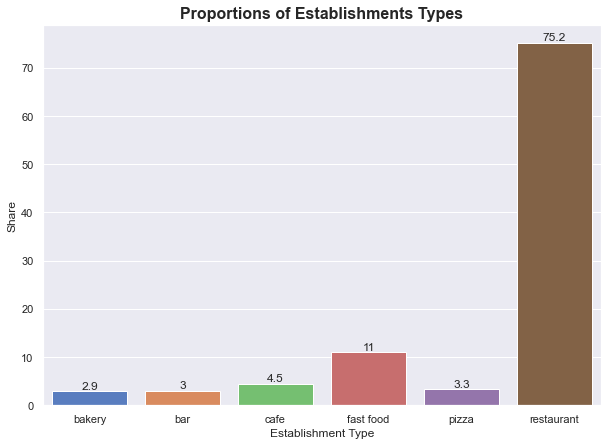

In [38]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='object_type', y='share_types', data=types_prop, palette = 'muted')
plt.title('Proportions of Establishments Types', fontsize=16, fontweight='bold')
plt.xlabel('Establishment Type')
plt.ylabel('Share')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In the graph, it is evident how much the difference between restaurants and other establishments types.


# Proportion of Independent vs. Chain Establishments  <a id="Ind_vs_Ch"></a> 

In [39]:
df_rest['chain_category'].value_counts().reset_index()

,index,chain_category
0,independent,5659
1,chain,3992


In [40]:
chain_prop = df_rest['chain_category'].value_counts(normalize=True).reset_index()
chain_prop.columns = ['chain_category','share']
chain_prop['share'] = (chain_prop['share']*100).round(1)
chain_prop

,chain_category,share
0,independent,58.6
1,chain,41.4


59% percent of all establishments in LA are independent.


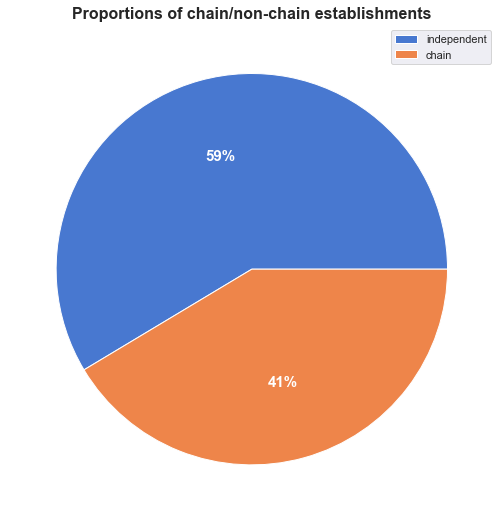

In [41]:
plt.figure(figsize=(9, 9))
plt.title('Proportions of chain/non-chain establishments', fontsize=16, fontweight='bold')
plt.pie(chain_prop['share'], labels=chain_prop['chain_category'], autopct='%1.0f%%',
        startangle=0,colors=sns.color_palette('muted') ,
        textprops={'color':'white','weight':'bold',  'fontsize': 15})
plt.legend()
plt.show()

Now we suggest checking how chains and independent venues are distributed across the different types of establishments. At first we need to group the data. 


In [42]:
type_chain = df_rest.groupby(['object_type', 'chain_category']).agg({'id':'nunique'}).reset_index()
type_chain.columns = ['type', 'chain_category', 'count']
type_chain

,type,chain_category,count
0,bakery,chain,283
1,bakery,independent,0
2,bar,chain,83
3,bar,independent,209
4,cafe,chain,277
5,cafe,independent,158
6,fast food,chain,658
7,fast food,independent,408
8,pizza,chain,174
9,pizza,independent,146


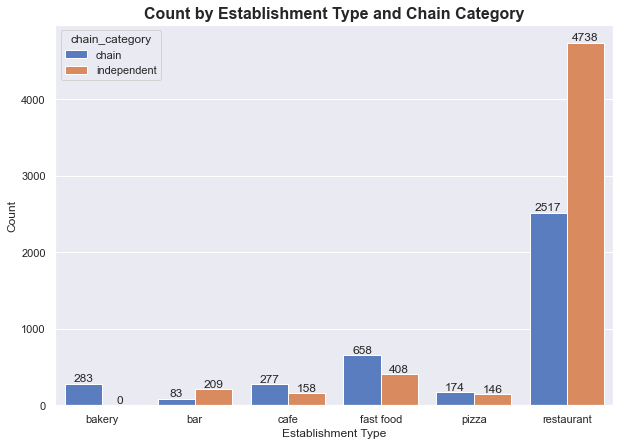

In [43]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 7))

ax = sns.barplot(x='type', y='count', hue='chain_category', data=type_chain, palette = 'muted')
plt.title('Count by Establishment Type and Chain Category', fontsize=16, fontweight='bold')
plt.xlabel('Establishment Type')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Although independent establishments are the most common overall, the situation varies within each establishment type. Four of the six types (pizza, fast food, cafe, and bakery) have more chain venues, while the other two (restaurant and bakery) have more independent entities. The bakery category has only chain venues and no independent ones. Restaurants as those establishments who have the biggest share in total numbers of outlets skewed overall proportion to independent (inside this type there are almost twice more independent establishments).

#  Seats Distribution Across the Categories of Establishments <a id="Seat_dist"></a> 

At first let's have a look at numbers of seats distribution across allover venues data. Adding chains category on 'hue' parameter as well would help up us differentiate the distribution for chain and independent establishments.

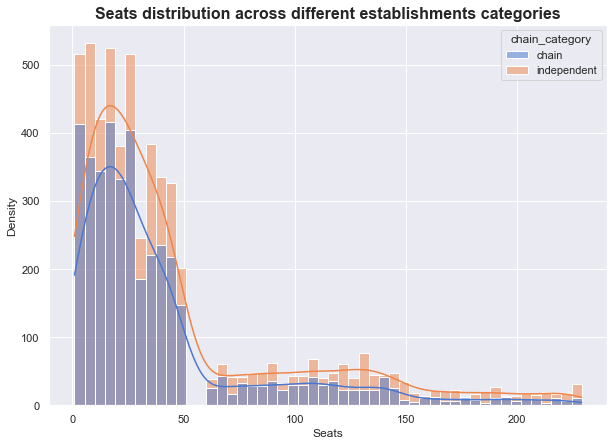

In [44]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df_rest, x="seats", kde=True, bins = 50, hue ='chain_category', palette = 'muted')
plt.title('Seats distribution across different establishments categories', fontsize=16, fontweight='bold')
plt.xlabel('Seats')
plt.ylabel('Density')
plt.show()

In [45]:
chain_rest=df_rest.query('chain_category=="chain"')
indep_rest=df_rest.query('chain_category=="independent"')

In [46]:
print(f'Number of chain establishments with more than 50 seats: {len(chain_rest.query("seats>50"))}')
print(f'Number of chain establishments with less than 50 seats: {len(chain_rest.query("seats<=50"))}')

Number of chain establishments with more than 50 seats: 711
Number of chain establishments with less than 50 seats: 3281


In [47]:
print(f'Number of independent establishments with more than 50 seats: {len(indep_rest.query("seats>50"))}')
print(f'Number of independent establishments with less than 50 seats: {len(indep_rest.query("seats<=50"))}')

Number of independent establishments with more than 50 seats: 1278
Number of independent establishments with less than 50 seats: 4381


The majority of venues for both chain (80%) and independent (70%) establishments have seats bellow 50.

In [48]:
many_seats_chain = chain_rest.query('seats>50')['seats'].sum()
few_seats_chain = chain_rest.query('seats<=50')['seats'].sum()
many_seats_chain_share = ((many_seats_chain/chain_rest['seats'].sum())*100).round(1)
few_seats_chain_share = ((few_seats_chain/chain_rest['seats'].sum())*100).round(1)

print(f'Total number of seats in chains\' with a capacity of more than 50: {many_seats_chain}, share: {many_seats_chain_share}')
print(f'Total number of seats in chains\' with a capacity less than 50: {few_seats_chain}, share: {few_seats_chain_share}')

Total number of seats in chains' with a capacity of more than 50: 86062, share: 54.2
Total number of seats in chains' with a capacity less than 50: 72765, share: 45.8


In [49]:
indep_rest=df_rest.query('chain_category=="independent"')
many_seats_indep = indep_rest.query('seats>50')['seats'].sum()
few_seats_indep = indep_rest.query('seats<=50')['seats'].sum()
many_seats_indep_share = ((many_seats_indep/indep_rest['seats'].sum())*100).round(1)
few_seats_indep_share = ((few_seats_indep/indep_rest['seats'].sum())*100).round(1)

print(f'Total number of seats in independents\' with a capacity of more than 50: {many_seats_indep}, share: {many_seats_indep_share}')
print(f'Total number of seats in independents\' with a capacity less than 50: {few_seats_indep}, share: {few_seats_indep_share}')

Total number of seats in independents' with a capacity of more than 50: 162761, share: 61.9
Total number of seats in independents' with a capacity less than 50: 100114, share: 38.1


On other hand establishment with seats over 50 holds more than 50% of the overall market capacity, 54% among chains and 62% among independents. Since we don't have any financial data (revenue, net profit etc) on existing establishments we can't assume which approach is better. Just recording the fact.

Now let's move on to visualize the insight we got above


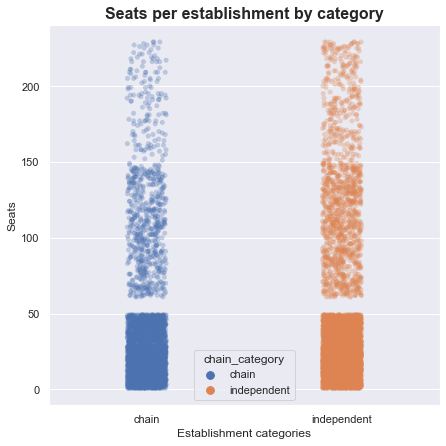

In [50]:
plt.figure(figsize=(7, 7))
sns.stripplot(x="chain_category", y="seats",hue="chain_category", data=df_rest, alpha =0.3)
plt.title('Seats per establishment by category', fontsize=16, fontweight='bold')
plt.xlabel('Establishment categories')
plt.ylabel('Seats')
plt.show()

The stripplot above provides a general idea of the distribution of seats in the establishments, showing that the vast majority of establishments have seats no more than 50, as indicated by the gap between 50 and 60 and the sharp difference in density after 60. However, it is difficult to compare the total numbers and distribution of seats between chain and independent establishments, and impossible to determine the most popular number of seats due to dots stickiness. Let's try another approach.

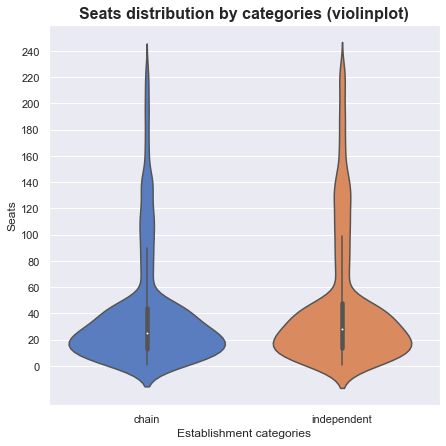

In [51]:
plt.figure(figsize=(7, 7))
sns.violinplot(y="seats", x = "chain_category", data=df_rest, palette='muted')
plt.title('Seats distribution by categories (violinplot)', fontsize=16, fontweight='bold')
plt.xlabel('Establishment categories')
plt.ylabel('Seats')
plt.yticks(range(0, 250, 20))
plt.show()

With the help of the violin plot, we can conclude:

- the most frequent number of seats in both groups is around 20.
- high-capacity establishments are rare.
- the higher whisker for both distributions indicates that venues with more than 90-100 seats could be cosidired as huge.
- despite similarities, the independent establishments have a more even distribution of seats compared to chains. The independent establishments have a larger proportion of high capacity venues compared to chains, as evidenced by the thicker top part,smaller lower part and more round shape of the violin plot.

And another way - probably the most comprehensible one

In [52]:
overall_stat = df_rest.groupby(['seats','chain_category'])['id'].count().reset_index().sort_values(by='id', ascending = False)
overall_stat.columns = ['total_seats','chain_category','est_count']
overall_stat.head()

,total_seats,chain_category,est_count
9,5,independent,121
37,19,independent,119
49,25,independent,117
21,11,independent,115
19,10,independent,114


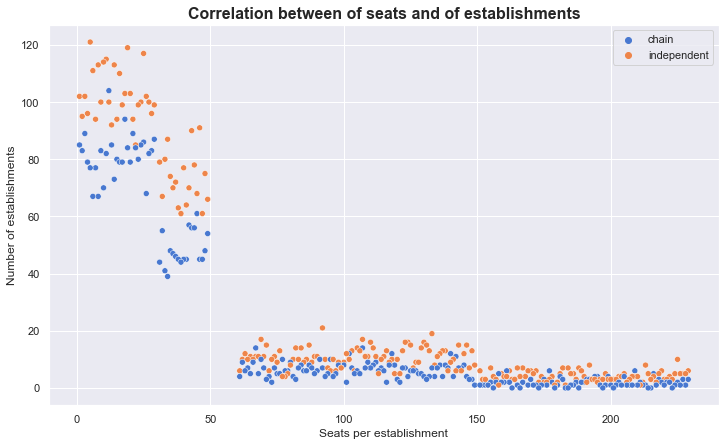

In [53]:
plt.figure(figsize=(12, 7))
sns.set(style='darkgrid')
sns.scatterplot(data=overall_stat, x='total_seats', y='est_count',hue = 'chain_category', palette='muted')
plt.title('Correlation between of seats and of establishments', fontsize=16, fontweight='bold')
plt.xlabel('Seats per establishment')
plt.ylabel('Number of establishments')
plt.legend()
plt.show()

So, to summarize, we can conclude that both chain and independent venues have the same pattern: significantly more establishments with a small number of seats (under 20) and a few establishments with a lot of seats

# Average Number of Seats by Type of Establishment <a id="AVG_seats"></a> 

Let's determine the average and the median number of seats for each type of establishments


In [54]:
type_seats = df_rest.pivot_table (index = 'object_type', values = 'seats', aggfunc = ['mean','median']).reset_index()
type_seats.columns = ('object_type','avg_seats','median_seats')
type_seats['avg_seats'] = type_seats['avg_seats'].round(1)
type_seats

,object_type,avg_seats,median_seats
0,bakery,21.8,18.0
1,bar,44.8,28.5
2,cafe,25.0,21.0
3,fast food,31.8,21.0
4,pizza,28.5,18.5
5,restaurant,48.0,29.0


Melting the dataframe in order to plot further median and average values side by side in one bar graph.

In [55]:
type_seats_melt = type_seats.melt(id_vars='object_type', value_vars=['avg_seats', 'median_seats'], var_name='statistic')
type_seats_melt.head()

,object_type,statistic,value
0,bakery,avg_seats,21.8
1,bar,avg_seats,44.8
2,cafe,avg_seats,25.0
3,fast food,avg_seats,31.8
4,pizza,avg_seats,28.5


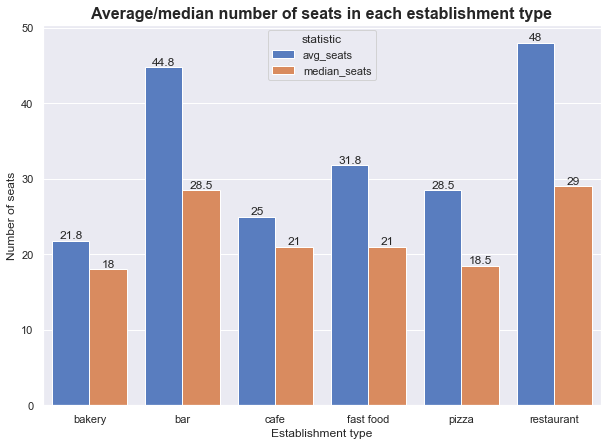

In [56]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 7))

ax = sns.barplot(data = type_seats_melt, x = 'object_type', y = 'value',hue = 'statistic',  palette = 'muted')
plt.title("Average/median number of seats in each establishment type", fontsize=16, fontweight='bold')
plt.ylabel("Number of seats")
plt.xlabel("Establishment type")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()



The restaurant category has the highest average number of seats among all establishment types, with an average of 48 seats per venue. Bars come in second with an average of 45 seats per venue. These two categories also have the highest median values for number of seats (29 and 28.5).

# Extracting Street Names from Establishments Addresses <a id="ext_street"></a>


To get the street names from full addresses, we can use the 'usaddress' library.

In [57]:
df_rest['street'] = df_rest['address']
for i in df_rest.index:
    us_address = us.parse(df_rest['address'][i])
    for w in us_address:
        if w[1] == 'StreetName':
            street = w[0]
        if w[1] == 'StreetNamePostType':
            street += ' ' + w[0]
    df_rest['street'][i] = street
df_rest.head()

/var/folders/h4/nypjjg6j0z99xyxph5m6ddl80000gn/T/ipykernel_19232/1052265872.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rest['street'][i] = street


,id,object_name,address,chain,object_type,seats,chain_category,street
0,11786,habitat coffee shop,3708 n eagle rock blvd,False,cafe,26,independent,rock blvd
1,11787,reillys,100 world way # 120,False,restaurant,9,independent,world way
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20,independent,hollywood blvd
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,independent,sunset blvd
4,11790,pollen,2100 echo park ave,False,restaurant,20,independent,park ave


In [58]:
df_unique_streets = pd.DataFrame(df_rest['street'].unique(), columns=['street'])
df_unique_streets.sample(20)

,street
14,wall st
374,king blvd
490,jr
252,cole ave
381,jefferson ave
53,505
275,barrington ct
25,flower st
257,central
71,vermont ave


The 'usaddress' library has been helpful in parsing street names from addresses with minimal manipulation

# The Most Popular Streets for Establishments in LA <a id="Pop_street"></a>


In [59]:
street_rating = df_rest['street'].value_counts().reset_index()
street_rating.columns = ['street','n_establishments']
street_top10 = street_rating.head(10)
street_top10

,street,n_establishments
0,sunset blvd,405
1,wilshire blvd,397
2,pico blvd,372
3,western ave,367
4,figueroa st,332
5,olympic blvd,310
6,vermont ave,286
7,monica blvd,264
8,3rd st,261
9,hollywood blvd,254


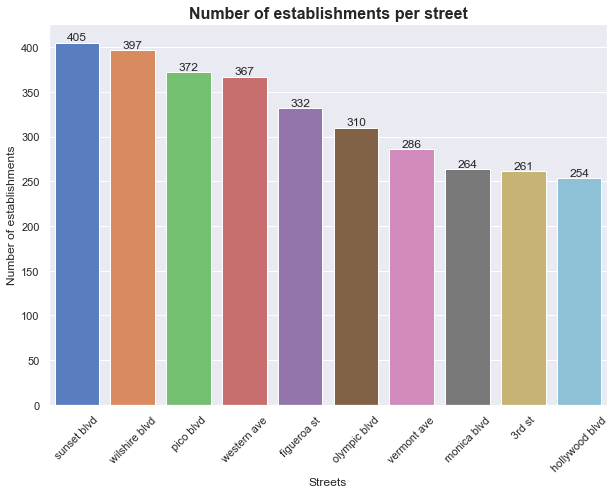

In [60]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 7))

ax = sns.barplot(data = street_top10, x = 'street', y = 'n_establishments',  palette = 'muted')
plt.title("Number of establishments per street", fontsize=16, fontweight='bold')
plt.ylabel("Number of establishments")
plt.xlabel("Streets")
plt.xticks(rotation = 45)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

Sunset Boulevard and Wilshire Boulevard are almost equally popular among establishments in LA, with a small difference in between: 405 and 397, making Sunset Boulevard the most popular. The situation is the same for third and fourth place, with 372 establishments located on Pico Boulevard and 367 on Western Boulevard. Then the number of establishments gradually decreases from the 5th (332) to the 7th place (286) to around 260 for the 8th to 10th places.

Now adding chain category information

In [61]:
strcat_rating = df_rest.pivot_table(index='street',columns='chain_category',values='id',aggfunc='count').reset_index()
strcat_rating.columns = ['street','chain','independent']
strcat_rating['total'] = strcat_rating['chain'] + strcat_rating['independent']
strcat_rating = strcat_rating.sort_values(by='total',ascending=False).head(10)
strcat_rating

,street,chain,independent,total
442,sunset blvd,159,246,405
507,wilshire blvd,169,228,397
386,pico blvd,140,232,372
495,western ave,156,211,367
207,figueroa st,158,174,332
366,olympic blvd,129,181,310
465,vermont ave,125,161,286
343,monica blvd,107,157,264
24,3rd st,101,160,261
259,hollywood blvd,89,165,254


In [62]:
strcat_rating_melt = strcat_rating.melt(id_vars='street', value_vars=['chain', 'independent'], var_name='status')
strcat_rating_melt = strcat_rating_melt.sort_values(by = 'value',ascending=False)
strcat_rating_melt

,street,status,value
10,sunset blvd,independent,246
12,pico blvd,independent,232
11,wilshire blvd,independent,228
13,western ave,independent,211
15,olympic blvd,independent,181
14,figueroa st,independent,174
1,wilshire blvd,chain,169
19,hollywood blvd,independent,165
16,vermont ave,independent,161
18,3rd st,independent,160


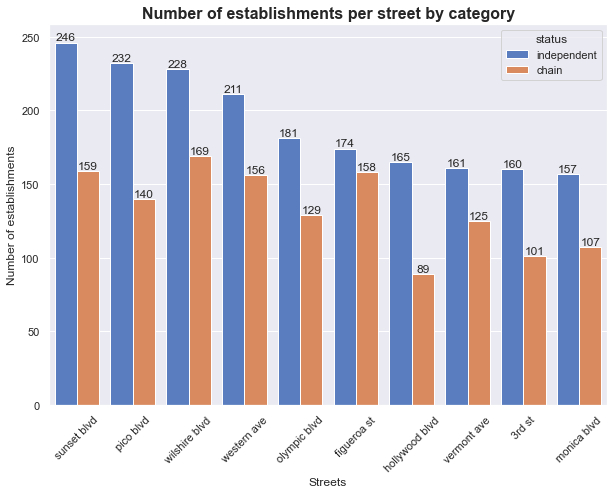

In [63]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 7))

ax = sns.barplot(data = strcat_rating_melt, x = 'street', y = 'value',hue = 'status',  palette = 'muted')
plt.title("Number of establishments per street by category", fontsize=16, fontweight='bold')
plt.ylabel("Number of establishments")
plt.xlabel("Streets")
plt.xticks(rotation = 45)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

For independent establishments, the top street distribution is almost the same as for the overall data, except that Pico Boulevard is now ranked second and Wilshire Boulevard is ranked third. However, the situation is slightly changed for chains, with Wilshire Boulevard being the most popular, followed by Sunset Boulevard in second place, and Figueroa Street in third.

Again, since we dont have neither the financial data (number of guests, revenue, profit, rent and other costs etc) neither the details on the models we cannot conclude anything out of the information above. We are just collecting the facts. Maybe it is not good idea to open new restaurant on Sunset blvd since the competition is great and thus probably its venue has less margin. We don't know. 

Furthermore, the streets are long and having the restaurant on the Sunset boulevard but on the outskirt of the city and having it in the city center on the same street is not the same. To better understand the distribution of establishments across the city, it would be helpful to plot them on a city map based on their coordinates.

# LA streets with only 1 establishment, observing the establishments <a id="Unpop_street"></a>



In [64]:
unpopular_street=street_rating.query('n_establishments==1')
unpopular_street.head()

,street,n_establishments
292,nebraska ave,1
293,post ave,1
294,newell ave,1
295,42nd st,1
296,9th ave,1


In [65]:
len(unpopular_street)

229

There are 229 streets with only one establishment. Let's have a closer look at them.

In [66]:
unpopular_street_details = df_rest.query('street in @unpopular_street.street')
unpopular_street_details

,id,object_name,address,chain,object_type,seats,chain_category,street
59,11845,wax paper,2902 knox ave,False,restaurant,2,independent,knox ave
63,11849,j f ice cream shop,1703 mariachi plz,False,restaurant,17,independent,mariachi plz
66,11852,eagle rock brewery,3056 roswell st,True,restaurant,16,chain,roswell st
138,11924,carls jr,308 westwood plz 505,True,restaurant,37,chain,505
142,11928,microsoft theater,777 w chick hearn ct,False,restaurant,21,independent,hearn ct
...,...,...,...,...,...,...,...,...
9571,21357,broadwater plunge,1078 lillian way,False,restaurant,35,independent,lillian way
9572,21358,le macaron,541 s spring # 127,True,restaurant,17,chain,spring
9614,21400,meatology mediterranean grill,4143 lankershim blvd,False,restaurant,28,independent,lankershim blvd
9627,21413,pizza buona,922 n alavarado st ste c,True,pizza,5,chain,alavarado st


In [67]:
unpopular_types_prop = unpopular_street_details['object_type'].value_counts(normalize=True).reset_index()
unpopular_types_prop.columns = ['object_type','share_types']
unpopular_types_prop['share_types'] = (unpopular_types_prop['share_types']*100).round(1)
unpopular_types_prop

,object_type,share_types
0,restaurant,86.0
1,fast food,5.2
2,bakery,2.6
3,cafe,2.6
4,bar,2.2
5,pizza,1.3


Comparing to the overall data on unpopular streets we have bigger share of restaurants (86% vs 75%)

In [68]:
unpopular_chain_prop = unpopular_street_details['chain_category'].value_counts(normalize=True).reset_index()
unpopular_chain_prop.columns = ['chain_category','share']
unpopular_chain_prop['share'] = (unpopular_chain_prop['share']*100).round(1)
unpopular_chain_prop

,chain_category,share
0,independent,63.8
1,chain,36.2


And independent venues: 64% vs 58%

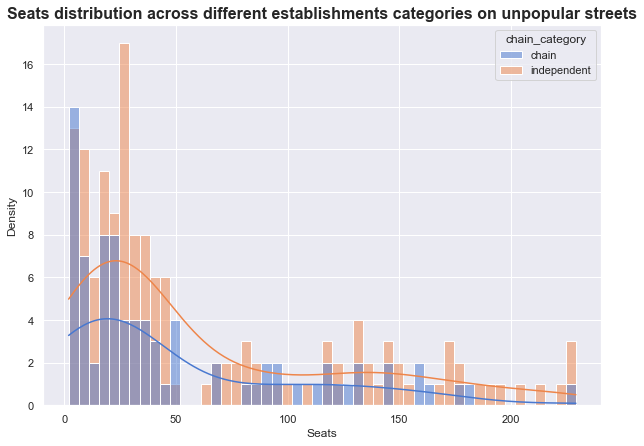

In [69]:
plt.figure(figsize=(10, 7))
sns.histplot(data=unpopular_street_details, x="seats", kde=True, bins = 50, hue ='chain_category', palette = 'muted')
plt.title('Seats distribution across different establishments categories on unpopular streets', fontsize=16, fontweight='bold')
plt.xlabel('Seats')
plt.ylabel('Density')
plt.show()

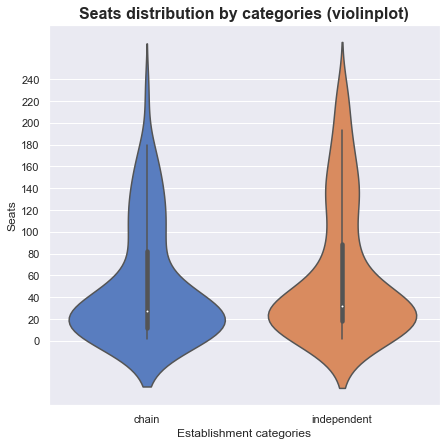

In [70]:
plt.figure(figsize=(7, 7))
sns.violinplot(y="seats", x = "chain_category", data=unpopular_street_details, palette='muted')
plt.title('Seats distribution by categories (violinplot)', fontsize=16, fontweight='bold')
plt.xlabel('Establishment categories')
plt.ylabel('Seats')
plt.yticks(range(0, 250, 20))
plt.show()

In [71]:
many_seats_unpop = unpopular_street_details.query('seats>50')['seats'].sum()
many_seats_unpop_share = ((many_seats_unpop/unpopular_street_details['seats'].sum())*100).round(1)

many_seats_unpop90 = unpopular_street_details.query('seats>90')['seats'].sum()
many_seats_unpop90_share = ((many_seats_unpop90/unpopular_street_details['seats'].sum())*100).round(1)


print(f'Total number of seats in establishments with a capacity of more than 50: {many_seats_unpop}, share: {many_seats_unpop_share}')
print(f'Total number of seats in establishments with a capacity of more than 90: {many_seats_unpop90}, share: {many_seats_unpop90_share}')


Total number of seats in establishments with a capacity of more than 50: 9636, share: 74.0
Total number of seats in establishments with a capacity of more than 90: 8333, share: 64.0


Like overall data, restaurants on unpopular streets tend to have around 20 seats, but the share of huge restaurants (more than 90 seats) is significantly higher. In the overall city data we had around 50%-60% of those restaurants who have more than 50 seats but on unpopular streets it is 74% and for those who have more than 90 seats - 64%. It is fair, usually on the less popular areas it is easier to attract more people, and it is likely to be those establishments located on unpopular streets far from the city center and due to its capacity, it may serve as the venue for special events such as weddings, parties, and ceremonies.

# LA streets with many establishments, observing the establishments <a id="Pop_street_details"></a>

I suggest that we use the top 10 most popular streets we discovered earlier as a benchmark for 'many'.

In [72]:
street_top10

,street,n_establishments
0,sunset blvd,405
1,wilshire blvd,397
2,pico blvd,372
3,western ave,367
4,figueroa st,332
5,olympic blvd,310
6,vermont ave,286
7,monica blvd,264
8,3rd st,261
9,hollywood blvd,254


In [73]:
np.quantile(street_rating['n_establishments'], [0.90, 0.95, 0.98, 0.99])


array([ 44. ,  90. , 218.2, 305.2])

The number of restaurants on the 10 most popular streets is so high that every of them falls within the 99th percentile level

In [74]:
popular_street_details = df_rest.query('street in @street_top10.street')
popular_street_details.head()

,id,object_name,address,chain,object_type,seats,chain_category,street
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20,independent,hollywood blvd
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,independent,sunset blvd
10,11796,el pollo loco,5319 w sunset blvd,True,restaurant,38,chain,sunset blvd
11,11797,poong nyun bakery,928 s western ave ste 109,True,bakery,17,chain,western ave
14,11800,cuscatleca bakery,2501 w sunset blvd #a,True,bakery,26,chain,sunset blvd


In [75]:
popular_types_prop = popular_street_details['object_type'].value_counts(normalize=True).reset_index()
popular_types_prop.columns = ['object_type','share_types']
popular_types_prop['share_types'] = (popular_types_prop['share_types']*100).round(1)
popular_types_prop

,object_type,share_types
0,restaurant,77.2
1,fast food,9.2
2,cafe,4.5
3,pizza,3.6
4,bakery,3.0
5,bar,2.5


We have almost the same distribution of establishment types here as in the overall data, but every type has slightly lost its share to more popular types. Restaurants have gained 2%

In [76]:
popular_chain_prop = popular_street_details['chain_category'].value_counts(normalize=True).reset_index()
popular_chain_prop.columns = ['chain_category','share']
popular_chain_prop['share'] = (popular_chain_prop['share']*100).round(1)
popular_chain_prop

,chain_category,share
0,independent,59.0
1,chain,41.0


The proportion of chain/independent venues is the same as in the overall street data

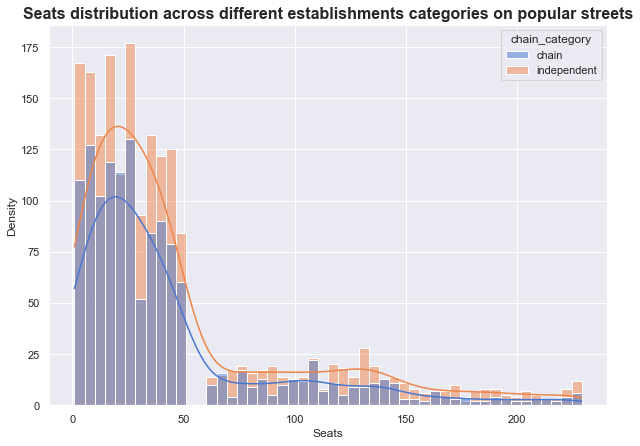

In [77]:
plt.figure(figsize=(10, 7))
sns.histplot(data=popular_street_details, x="seats", kde=True, bins = 50, hue ='chain_category', palette = 'muted')
plt.title('Seats distribution across different establishments categories on popular streets', fontsize=16, fontweight='bold')
plt.xlabel('Seats')
plt.ylabel('Density')
plt.show()

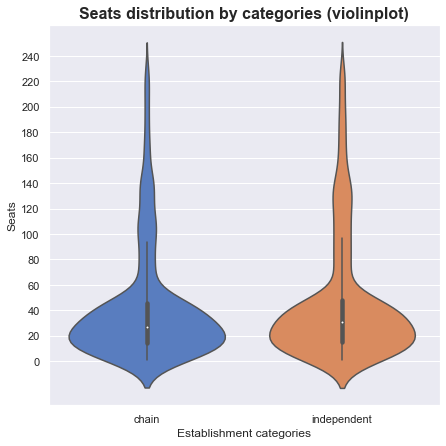

In [78]:
plt.figure(figsize=(7, 7))
sns.violinplot(y="seats", x = "chain_category", data=popular_street_details, palette='muted')
plt.title('Seats distribution by categories (violinplot)', fontsize=16, fontweight='bold')
plt.xlabel('Establishment categories')
plt.ylabel('Seats')
plt.yticks(range(0, 250, 20))
plt.show()

In [79]:
many_seats_pop = popular_street_details.query('seats>50')['seats'].sum()
many_seats_pop_share = ((many_seats_pop/popular_street_details['seats'].sum())*100).round(1)

print(f'Total number of seats in establishments with a capacity of more than 50: {many_seats_pop}, share: {many_seats_pop_share}')


Total number of seats in establishments with a capacity of more than 50: 87743, share: 59.2


In [80]:
popular_street_details.head()

,id,object_name,address,chain,object_type,seats,chain_category,street
2,11788,street churros,6801 hollywood blvd # 253,False,fast food,20,independent,hollywood blvd
3,11789,triniti echo park,1814 w sunset blvd,False,restaurant,22,independent,sunset blvd
10,11796,el pollo loco,5319 w sunset blvd,True,restaurant,38,chain,sunset blvd
11,11797,poong nyun bakery,928 s western ave ste 109,True,bakery,17,chain,western ave
14,11800,cuscatleca bakery,2501 w sunset blvd #a,True,bakery,26,chain,sunset blvd


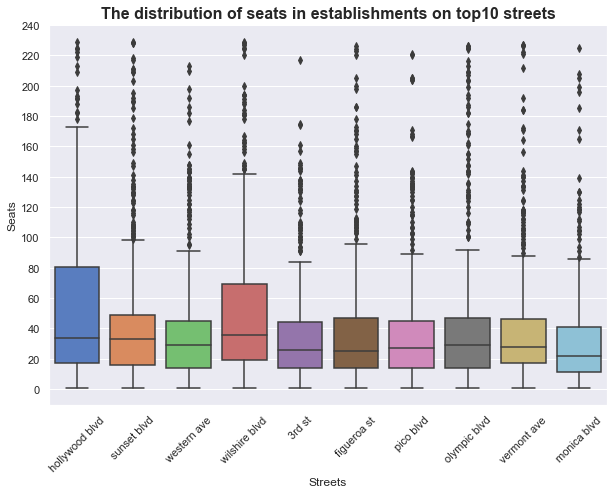

In [81]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(data=popular_street_details, x="street", y="seats", palette = 'muted')
plt.xticks(rotation = 45)
plt.title('The distribution of seats in establishments on top10 streets', fontsize=16, fontweight='bold')
plt.xlabel('Streets')
plt.ylabel('Seats')
plt.yticks(range(0, 250, 20))
plt.show()

Distribution of seats across the venues on the most popular streets is very similar as for overall street data: the same 60% share of venues with seats >50, the most frequent number of seats is around 20, venues with more than 90-100 seats could be considered as huge, the same difference between independent and chain violinplot - within independent venues the are slightly more high-capacity establishments.


In terms of street-by-street analysis, we found that only Hollywood Boulevard and Wilshire Boulevard significantly differ from the others. On average, they have more high-capacity venues than the rest of the streets. For the remaining streets, the distribution is generally the same as for the total data across all 10 popular streets

# Conclusion  <a id="Conclusion"></a>

Market research has started with revealing some data issues and further preproccessing. The following changes were made:
- The column name 'number' was renamed to 'seats; to better reflect its content.
- The object_name', 'address, and 'object_type' columns were converted to lowercase.
- There were 3 missing values in the 'chain' column.  Since they were just ones under its names we have assigned them to 'chain' category.
- The 'object_type' column was changed to a categorical data type to save memory.
- The 'chain' column's data type was changed from 'object' to 'boolean'. A new column called 'chain_category' was created to differentiate between chain (true) and independent(false) establishments.
- After counting the number of unique 'chain_category 'values for each venue's name it turned out that there were few venues assigned both to chain and independent categories. Venues that were mistakenly categorized as 'independent' were reassigned to the 'chain' category, based on their ownership status.
- We identified implicit duplicates in the 'object_name' column, which were resolved using regular expressions and manual corrections. As a result, the number of unique venue names decreased from 8,672 to 7,802. Additionally, we changed the 'chain_category' for 'independent' venues that had more than one establishment to 'chain' status.
- With help of 'usaddress' library we parsed street names from addresses, assigned streets value to a new column 'street'

The conclusion from the analysis is as follows:
1. Restaurants are the most popular establishment type in LA, with 7255 establishments compared to  second  most popular type - 1066 for fast food outlets. Pizza, bars, and bakeries have the smallest shares. Restaurants account for 75% of all establishment types in LA.
2. 59% of all establishments in LA are independent.
3. Although independent establishments are the most common overall, the situation varies within each establishment type. Four of the six types (pizza, fast food, cafe, and bakery) have more chain venues, while the other two (restaurant and bakery) have more independent entities. Restaurants, which have the biggest share of total outlets, skewed the overall proportion to independent (inside this type, there are almost twice more independent establishments).
4. The majority of venues for both chain (80%) and independent (70%) establishments have seats below 50. On the other hand, establishments with seats over 50 hold more than 50% of the overall market capacity, 54% among chains and 62% among independents. We don't have any financial data on existing establishments, so we can't assume which approach is better; we're simply recording the fact.
5. The vast majority of establishments have seats no more than 50, with the most frequent number of seats in both groups around 20. High-capacity establishments are rare. Venues with more than 90-100 seats could be considered huge. Despite similarities, the independent establishments have a more even distribution of seats compared to chains. The independent establishments have a larger proportion of high-capacity venues compared to chains, as evidenced by the thicker top part, smaller lower part, and more round shape of the violin plot.
6. The restaurant category has the highest average number of seats among all establishment types, with an average of 48 seats per venue. Bars come in second with an average of 45 seats per venue. These two categories also have the highest median values for the number of seats (29 and 28.5).
7. Sunset Boulevard and Wilshire Boulevard are almost equally popular among establishments in LA, with a small difference between them: 405 and 397, making Sunset Boulevard the most popular. The situation is the same for third and fourth place, with 372 establishments located on Pico Boulevard and 367 on Western Boulevard. Then the number of establishments gradually decreases from the 5th (332) to the 7th place (286) to around 260 for the 8th to 10th places. For independent establishments, the top street distribution is almost the same as for the overall data, except that Pico Boulevard is now ranked second and Wilshire Boulevard is ranked third. However, the situation is slightly changed for chains, with Wilshire Boulevard being the most popular, followed by Sunset Boulevard in second place, and Figueroa Street in third. Since we don't have financial data, we cannot conclude anything from this information.
8. There are 229 streets with only one establishment, and the share of restaurants is higher than in the overall data (86% vs. 75%). The share of independent venues is also higher (64% vs. 58%). Like the overall data, restaurants on unpopular streets tend to have around 20 seats, but the share of huge restaurants (more than 90 seats) is significantly higher. It is likely that these establishments, which are located on unpopular streets far from the city center, may serve as venues for special events such as weddings, parties, and ceremonies.
9. On the top 10 most popular streets, the number of restaurants is so high that each falls within the 99th percentile level. The proportion of establishment types and chain/independent venues is the same as in the overall

Recomendations

One of the biggest advantages of our robot venue is the ability to handle large groups of customers efficiently. Thus, I suggest opening a 40-50 seat venue, which is higher than the typical seats distribution. Going beyond this range is not recommended because the appearance and work of our robots won't be as visible. As for the establishment type, a restaurant + bar format would be suitable. This will provide customers with a more complete experience and increase the appeal of our establishment. Additionally, a restaurant + bar format allows us to offer a variety of food and drinks, which will attract a wider range of customers.

The location of the establishment should be on one of the most popular streets in LA, such as Sunset Boulevard, Wilshire Boulevard, or Pico Boulevard. Being located on a popular street with high traffic will help increase the visibility of our unusual restaurant and attract more customers.

In terms of developing a chain, it is recommended that we keep the venue as a boutique. This is because our robot cafe is a unique place, and it would be hard and costly to copy it excessively. However, we should not exclude the possibility of scaling the business in the future.

In terms of marketing, we need to focus on the novelty and unique aspect of the robot restaurant and bar, highlighting the fast service and reduced wait times for customers. We should also make the decor and atmosphere reflect the futuristic and innovative theme of the restaurant, with a mix of sleek and fun elements.

However, it is important to note that this suggestion is based solely on open information and does not take into account financial data. Currently, we do not have information on our competitors' revenue, cost, margin, number of visitors, and other financial metrics. Additionally, we have not developed a financial model for our own establishment, which is crucial for making informed business decisions. Therefore, this analysis is only a preliminary suggestion, and we will need to conduct further research and analysis to refine our plans and ensure the viability and profitability of our robot restaurant and bar.